#  **Predicting Pneumonia Disease Using Chest X-Ray Images Through Deep Learning Techniques**

In [ ]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import plot_model

In [48]:
len(os.listdir('/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Viral Pneumonia/images'))

1345

In [49]:
len(os.listdir('/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Normal/images'))

10192

In [50]:
import cv2

In [51]:
img = cv2.imread('/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Normal/images/Normal-10005.png')

In [52]:
import matplotlib.pyplot as plt

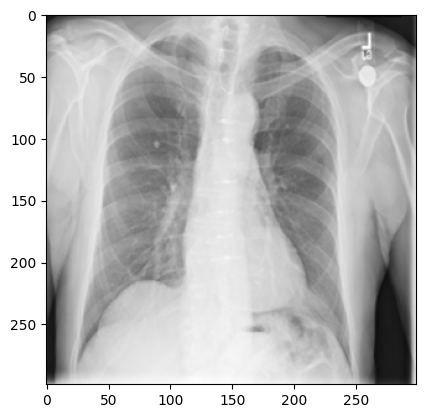

In [53]:
plt.imshow(img)

In [54]:
img.shape

(299, 299, 3)

In [55]:
import pandas as pd
import numpy as np

In [56]:
df = pd.read_excel('/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx')

In [57]:
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1,Viral Pneumonia-2,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
2,Viral Pneumonia-3,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
3,Viral Pneumonia-4,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
4,Viral Pneumonia-5,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


In [58]:
urls = os.listdir('/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Viral Pneumonia/images')

In [59]:
path = "/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Viral Pneumonia/images" + urls[0]

In [60]:
path

'/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Viral Pneumonia/imagesViral Pneumonia-1310.png'

In [61]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    print(img_path)
    # if we want to resize the images
    img = cv2.resize(img, (100, 100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [62]:
covid_path = "/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Viral Pneumonia/images"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)

/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-1310.png
/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-1144.png
/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-1022.png
/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-740.png
/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-199.png
/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-526.png
/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-634.png
/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-265.png
/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Viral Pne

In [63]:
len(covidUrl), len(covidImages)

(1345, 1345)

In [64]:
normal_path = "/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Normal/images"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 0)

/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Normal/images/Normal-859.png
/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Normal/images/Normal-158.png
/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Normal/images/Normal-10121.png
/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Normal/images/Normal-1811.png
/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Normal/images/Normal-97.png
/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Normal/images/Normal-1088.png
/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Normal/images/Normal-5663.png
/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Normal/images/Normal-6328.png
/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Normal/images/Normal-8410.png
/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Normal/images/Normal-5641.png
/kaggle/input/d/kalakon

In [65]:
covidImages.shape

(1345, 100, 100, 3)

In [66]:
normalImages.shape

(10192, 100, 100, 3)

In [67]:
data = np.r_[covidImages, normalImages]

In [68]:
data.shape

(11537, 100, 100, 3)

In [69]:
targets = np.r_[covidTargets, normalTargets]

In [70]:
targets.shape

(11537,)

In [71]:
# data = data / 255.0

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

In [74]:
import tensorflow as tf

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

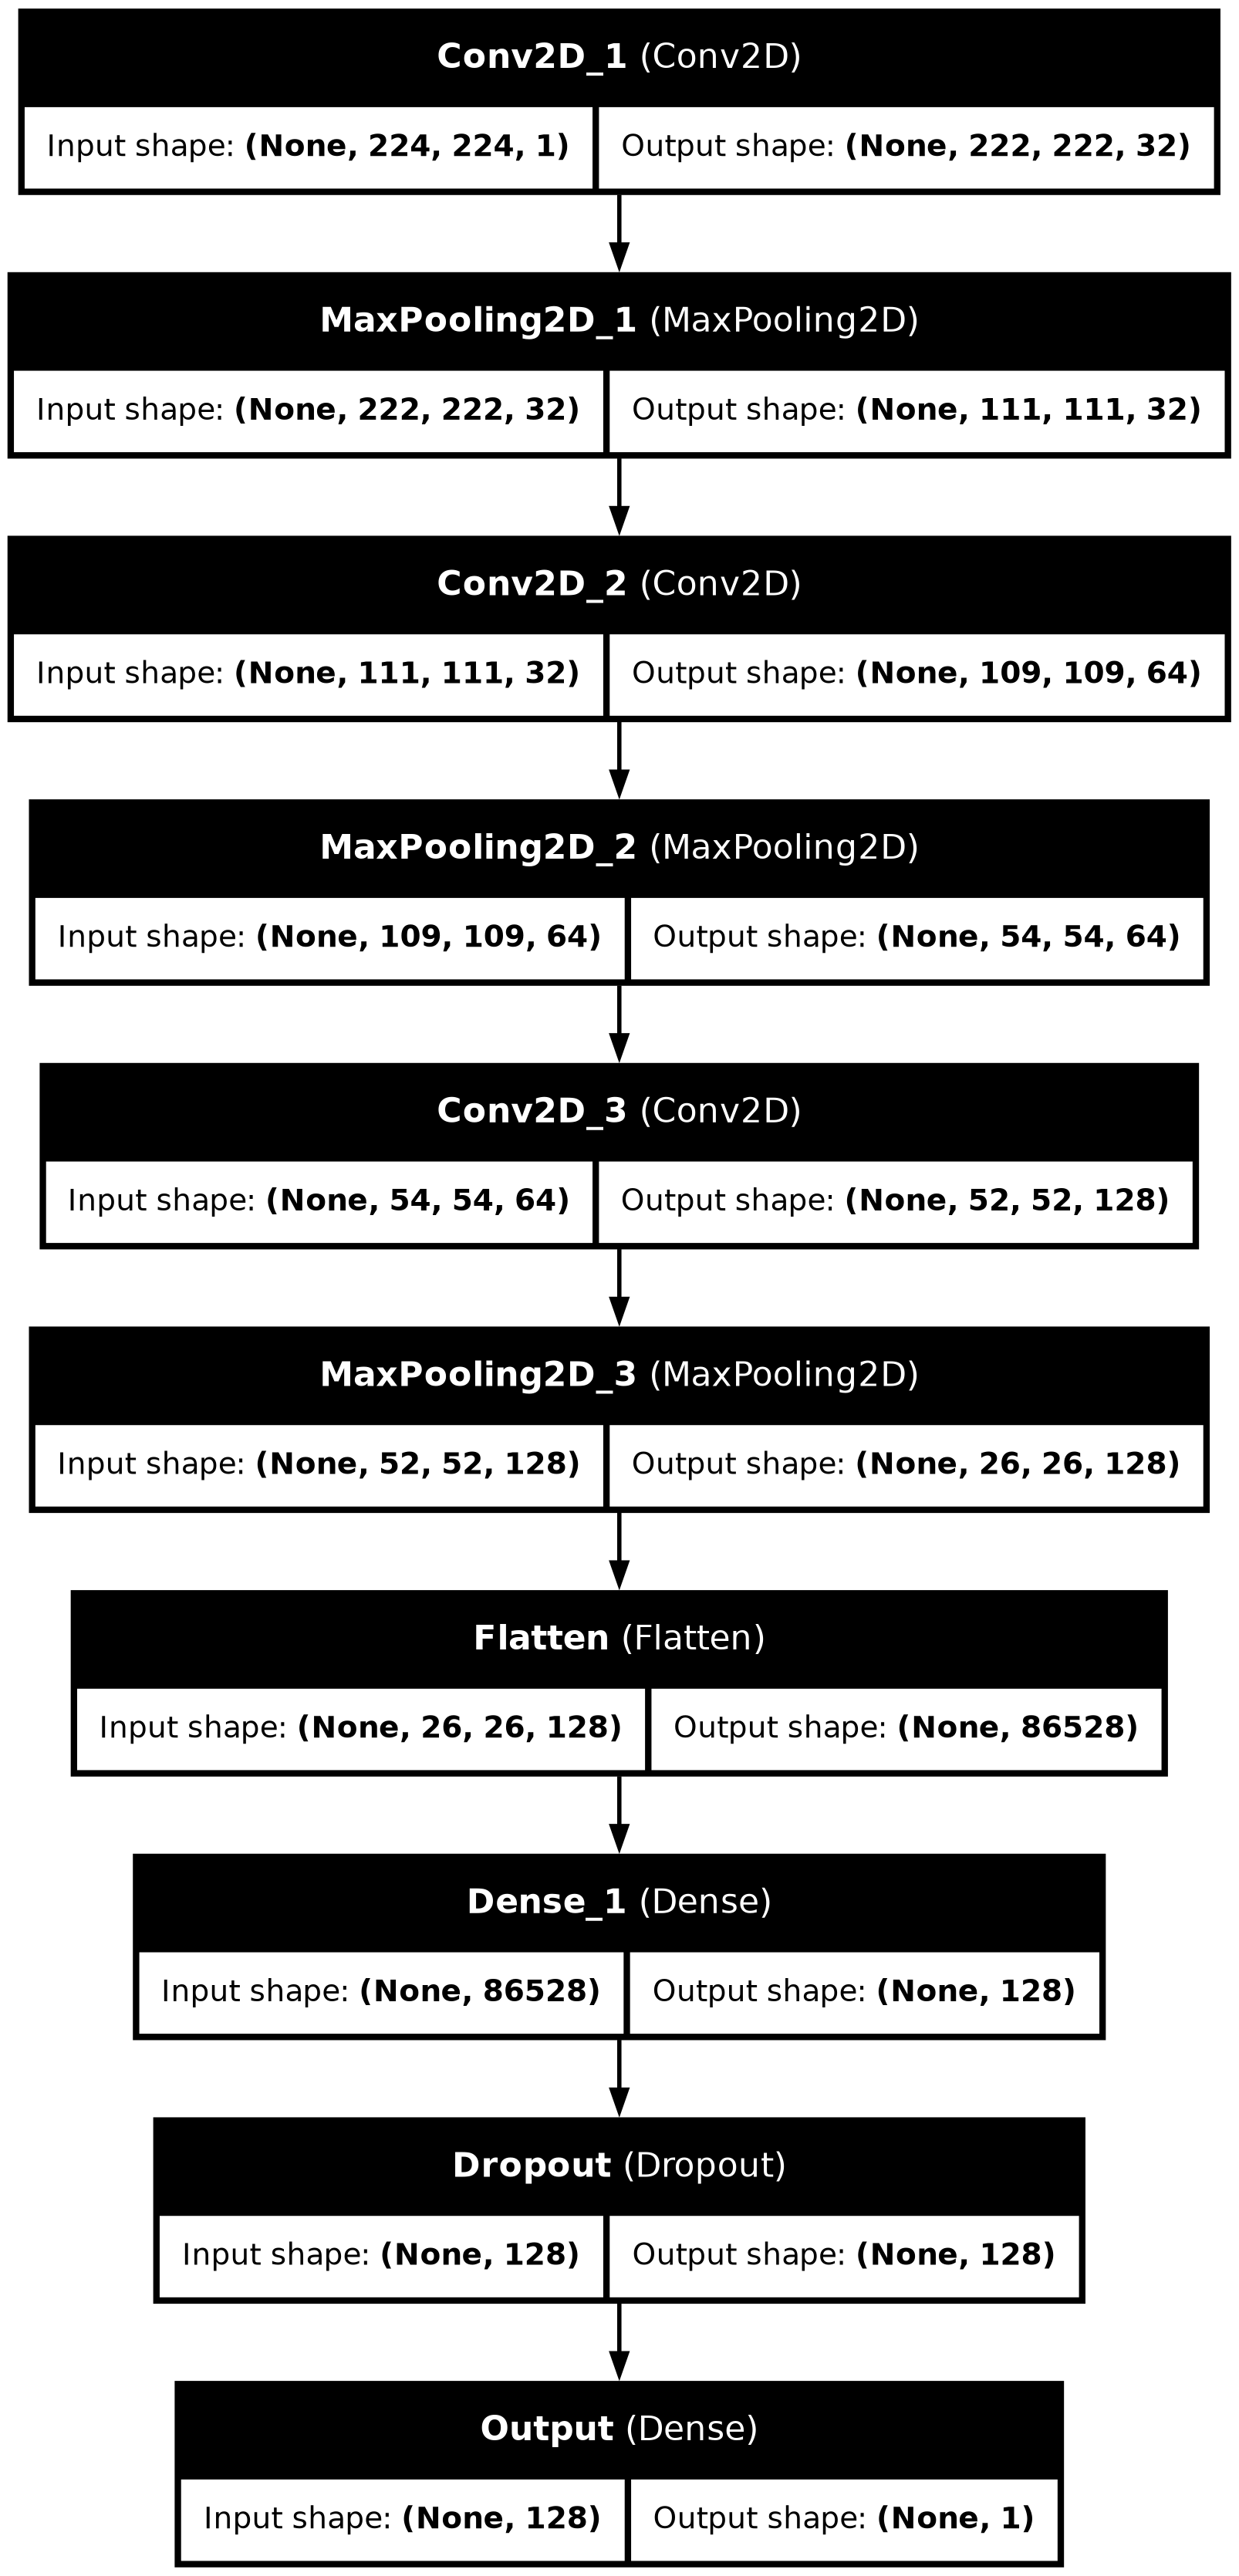

In [76]:
model = Sequential([
    Input(shape=(224, 224, 1), name='InputLayer'),  # Example input shape for X-ray images
    Conv2D(32, kernel_size=(3, 3), activation='relu', name='Conv2D_1'),
    MaxPooling2D(pool_size=(2, 2), name='MaxPooling2D_1'),
    Conv2D(64, kernel_size=(3, 3), activation='relu', name='Conv2D_2'),
    MaxPooling2D(pool_size=(2, 2), name='MaxPooling2D_2'),
    Conv2D(128, kernel_size=(3, 3), activation='relu', name='Conv2D_3'),
    MaxPooling2D(pool_size=(2, 2), name='MaxPooling2D_3'),
    Flatten(name='Flatten'),
    Dense(128, activation='relu', name='Dense_1'),
    Dropout(0.5, name='Dropout'),
    Dense(1, activation='sigmoid', name='Output')
])
plot_model(model, to_file='/kaggle/working/CNN_Pneumonia_Model.png', show_shapes=True, show_layer_names=True)


In [77]:
model = Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 47, 47, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 23, 23, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 21, 21, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 959,137 (3.66 MB)

 Trainable params: 959,137 (3.66 MB)

 Non-trainable params: 0 (0.00 B)

91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step


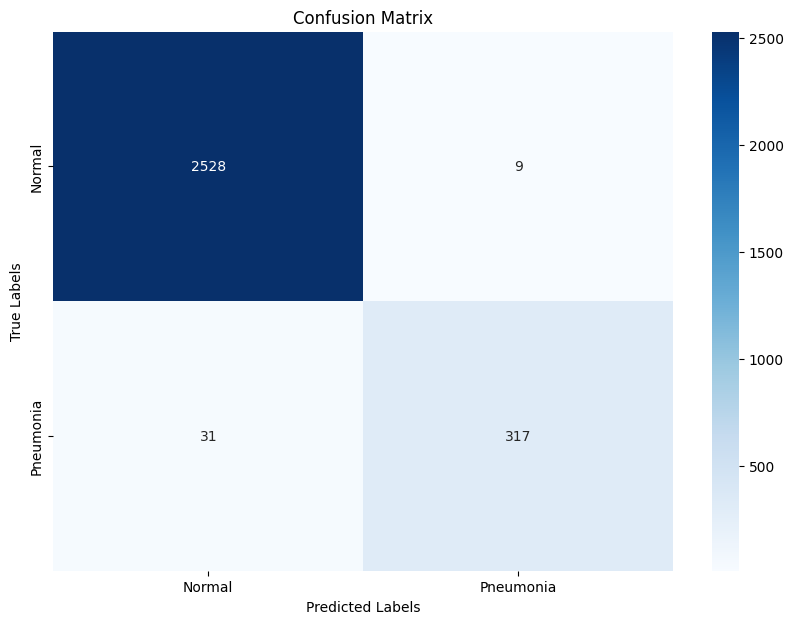

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


y_pred = model.predict(x_test)
y_pred_labels = (y_pred > 0.5).astype(int).reshape(-1)

# Step 2: Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)


# Step 3: Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step
Epoch 1: precision=0.9671, recall=0.9282, f1=0.9472
271/271 ━━━━━━━━━━━━━━━━━━━━ 50s 182ms/step - accuracy: 0.9920 - loss: 0.0204 - val_accuracy: 0.9875 - val_loss: 0.0461
Epoch 2/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step
Epoch 2: precision=0.9153, recall=0.9626, f1=0.9384
271/271 ━━━━━━━━━━━━━━━━━━━━ 47s 174ms/step - accuracy: 0.9932 - loss: 0.0181 - val_accuracy: 0.9847 - val_loss: 0.0618
Epoch 3/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step
Epoch 3: precision=0.9387, recall=0.9684, f1=0.9533
271/271 ━━━━━━━━━━━━━━━━━━━━ 83s 177ms/step - accuracy: 0.9923 - loss: 0.0196 - val_accuracy: 0.9886 - val_loss: 0.0449
Epoch 4/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step
Epoch 4: precision=0.9712, recall=0.8736, f1=0.9198
271/271 ━━━━━━━━━━━━━━━━━━━━ 48s 179ms/step - accuracy: 0.9952 - loss: 0.0148 - val_accuracy: 0.9816 - val_loss: 0.0536
Epoch 5/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step
Epoch 5: precision=0.9724, recall=0.9109, f1=0.9407
271/271 ━━

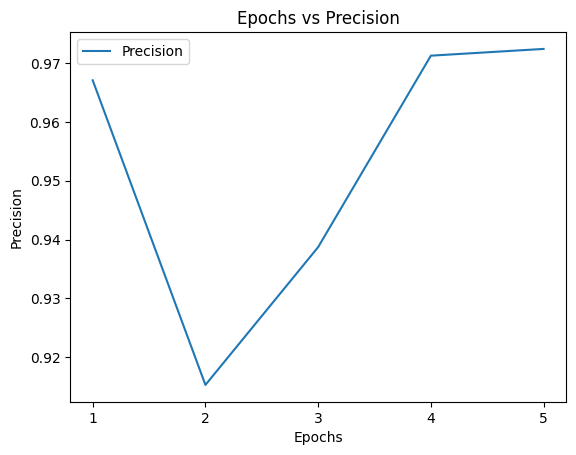

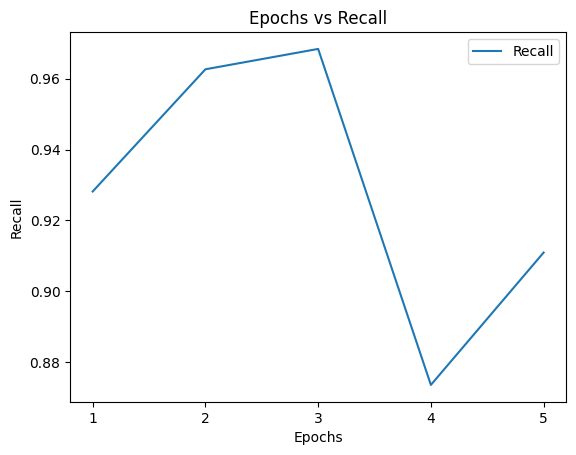

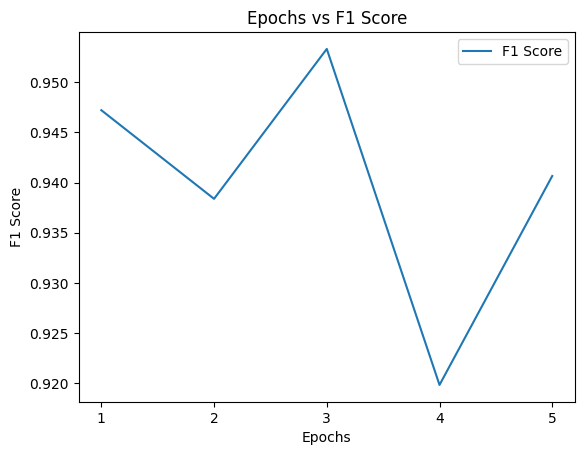

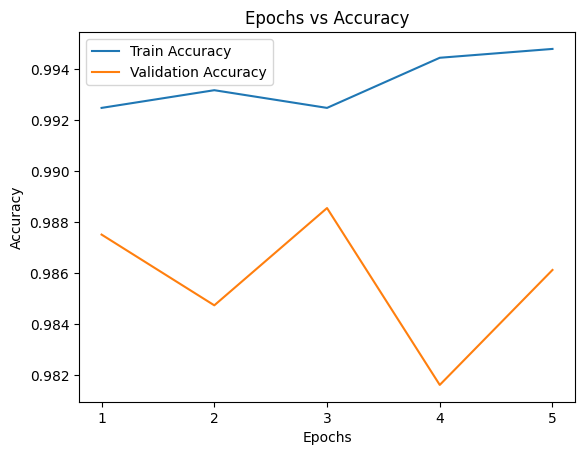

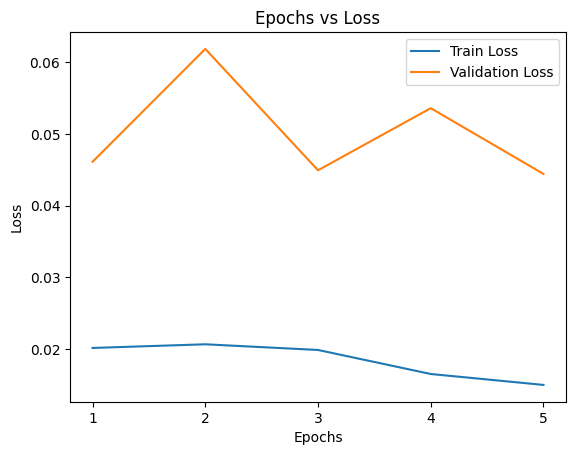

In [86]:
import matplotlib.pyplot as plt
from keras.callbacks import Callback
from sklearn.metrics import precision_score, recall_score, f1_score

class MetricsCallback(Callback):
    def __init__(self):
        super().__init__()
        self.precision = []
        self.recall = []
        self.f1 = []

    def on_epoch_end(self, epoch, logs=None):
        y_pred_probs = self.model.predict(x_test)
        y_pred = (y_pred_probs > 0.5).astype("int32")
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        self.precision.append(precision)
        self.recall.append(recall)
        self.f1.append(f1)
        print(f"Epoch {epoch+1}: precision={precision:.4f}, recall={recall:.4f}, f1={f1:.4f}")

metrics_callback = MetricsCallback()

# Train the model with the custom callback
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), callbacks=[metrics_callback])


# Plot precision
plt.figure()
plt.plot(range(1, len(metrics_callback.precision) + 1), metrics_callback.precision, label='Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.xticks(range(1, len(metrics_callback.precision) + 1))
plt.legend()
plt.title('Epochs vs Precision')
plt.show()

# Plot recall
plt.figure()
plt.plot(range(1, len(metrics_callback.recall) + 1), metrics_callback.recall, label='Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.xticks(range(1, len(metrics_callback.recall) + 1))
plt.legend()
plt.title('Epochs vs Recall')
plt.show()

# Plot F1 score
plt.figure()
plt.plot(range(1, len(metrics_callback.f1) + 1), metrics_callback.f1, label='F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.xticks(range(1, len(metrics_callback.f1) + 1))
plt.legend()
plt.title('Epochs vs F1 Score')
plt.show()

# Plot accuracy
plt.figure()
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label='Train Accuracy')
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(history.history['accuracy']) + 1))
plt.legend()
plt.title('Epochs vs Accuracy')
plt.show()

# Plot loss
plt.figure()
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], label='Train Loss')
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1, len(history.history['loss']) + 1))
plt.legend()
plt.title('Epochs vs Loss')
plt.show()


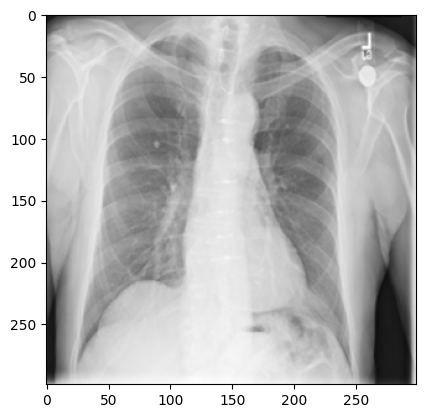

In [87]:
img1 = cv2.imread('/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Normal/images/Normal-10005.png')
plt.imshow(img1)

In [88]:
img1.shape

(299, 299, 3)

In [89]:
img1 = cv2.imread('/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Normal/images/Normal-859.png')
img1 = cv2.resize(img1, (100, 100))
img1 = np.expand_dims(img1, axis=0) / 255.0
prediction = model.predict(img1)
if prediction[0][0] > 0.5:
    print("Prediction: Pneumonia")
else:
    print("Prediction: Normal")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Prediction: Normal


In [90]:
img1 = cv2.imread('/kaggle/input/d/kalakondavinay/covid19/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-1310.png')
img1 = cv2.resize(img1, (100, 100))
img1 = np.expand_dims(img1, axis=0) / 255.0
prediction = model.predict(img1)
if prediction[0][0] > 0.5:
    print("Prediction: Pneumonia")
else:
    print("Prediction: Normal")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction: Pneumonia
